In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

c:\Users\MANYA\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x,y = mnist['data'] , mnist['target']

In [7]:
x.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
x[0].shape

(784,)

In [11]:
y.shape

(70000,)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

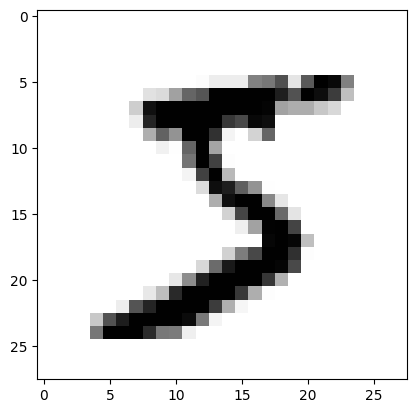

In [14]:
some_image=x[0]
some_image_rs = some_image.reshape(28,28)               #28x28=784
plt.imshow(some_image_rs, cmap = mpl.cm.binary)

In [15]:
y[0]

'5'

In [16]:
type(y[0])

str

In [17]:
import numpy as np
y = y.astype(np.uint8)

In [18]:
type(y[0])

numpy.uint8

In [28]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:], y[:60000], y[60000:]

In [29]:
y_train5=(y_train==5)
y_test5=(y_test==5)

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 33)
sgd_clf.fit(x_train,y_train5)

SGDClassifier(random_state=33)

In [34]:
sgd_clf.predict([some_image])

array([ True])

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train5,cv=3,scoring="accuracy")

array([0.913  , 0.9674 , 0.95865])

In [37]:
new_y=y.copy()

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train5,cv=3)

In [40]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

# Confusion Matirx : Precision , Recall

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train5,y_train_pred)
cm

array([[52663,  1916],
       [ 1303,  4118]], dtype=int64)

In [45]:
y_train_perf_pred=y_train5
confusion_matrix(y_train5,y_train_perf_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [47]:
cm[1,1]/(cm[1,1]+cm[0,1])

0.6824660258534968

In [49]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.7596384430916805

In [50]:
from sklearn.metrics import f1_score
f1_score(y_train5,y_train_pred)

0.7189873417721518

In [55]:
tn,fp,fn,tp=confusion_matrix(y_train5,y_train_pred).ravel()
print(tn,fp,fn,tp)

52663 1916 1303 4118


## Precision - Recall Tradeoff

In [58]:
y_score=sgd_clf.decision_function([some_image])
threshhold=0
y_score_pred=(y_score>threshhold)
y_score_pred

array([ True])

In [59]:
y_score

array([232.01620976])

In [60]:
threshhold = 300
y_score_pred=(y_score>threshhold)
y_score_pred

array([False])

In [61]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train5,cv=3,method='decision_function')

In [62]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,threshholds = precision_recall_curve(y_train5,y_scores)

In [63]:
type(precisions)

numpy.ndarray